# Days in years = 365

In [2]:
# Ensure the project root is in PATH.
import sys

sys.path.append("../")
# All imports of our code are relative to the project root.

from backtester.backtester import Backtester
from backtester.datamodel import TradingState, OrderDepth, Order, Listing
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import sys
import os

In [3]:
market_data_round_3_day_0 = pd.read_csv(os.path.join("..", "data", "round3", "prices_round_3_day_0.csv"), sep=";")
market_data_round_3_day_1 = pd.read_csv(os.path.join("..", "data", "round3", "prices_round_3_day_1.csv"), sep=";")
market_data_round_3_day_2 = pd.read_csv(os.path.join("..", "data", "round3", "prices_round_3_day_2.csv"), sep=";")

trades_round_3_day_0 = pd.read_csv(os.path.join("..", "data", "round3", "trades_round_3_day_0.csv"), sep=";")
trades_round_3_day_1 = pd.read_csv(os.path.join("..", "data", "round3", "trades_round_3_day_1.csv"), sep=";")
trades_round_3_day_2 = pd.read_csv(os.path.join("..", "data", "round3", "trades_round_3_day_2.csv"), sep=";")



# concatenates multiple days of historical data into 1.
# drops day column and replaces it with continuous timestamps.
# i.e. day -1 timestamp 0 becomes just timestamp 1,000,000
def concatenate_historical_data(data: list[pd.DataFrame]) -> pd.DataFrame:
    output = data[0]

    for i in range(1, len(data), 1):
        timeshift = output.iloc[-1]["timestamp"] + 100  # 100 for next day
        next_day_copy = data[i].copy()
        next_day_copy["timestamp"] += timeshift

        output = pd.concat([output, next_day_copy])

    return output


market_data_round_3_all3days = concatenate_historical_data([market_data_round_3_day_0, market_data_round_3_day_1, market_data_round_3_day_2])
trades_round_3_all3days = concatenate_historical_data([trades_round_3_day_0, trades_round_3_day_1, market_data_round_3_day_2])

In [8]:
market_data_round_3_day_0['product'].unique()

array(['VOLCANIC_ROCK_VOUCHER_10500', 'DJEMBES', 'CROISSANTS', 'JAMS',
       'VOLCANIC_ROCK_VOUCHER_10000', 'KELP',
       'VOLCANIC_ROCK_VOUCHER_9750', 'PICNIC_BASKET1', 'PICNIC_BASKET2',
       'VOLCANIC_ROCK_VOUCHER_9500', 'RAINFOREST_RESIN',
       'VOLCANIC_ROCK_VOUCHER_10250', 'SQUID_INK', 'VOLCANIC_ROCK'],
      dtype=object)

<Axes: >

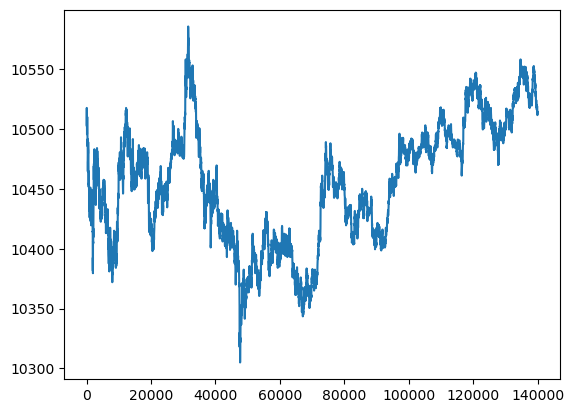

In [160]:
day_0_volcano = market_data_round_3_day_0[market_data_round_3_day_0['product'] == 'VOLCANIC_ROCK']
day_0_volcano_9500 = market_data_round_3_day_0[market_data_round_3_day_0['product'] == 'VOLCANIC_ROCK_VOUCHER_9500']
day_0_volcano_9750 = market_data_round_3_day_0[market_data_round_3_day_0['product'] == 'VOLCANIC_ROCK_VOUCHER_9750']
day_0_volcano_10000 = market_data_round_3_day_0[market_data_round_3_day_0['product'] == 'VOLCANIC_ROCK_VOUCHER_10000']
day_0_volcano_10500 = market_data_round_3_day_0[market_data_round_3_day_0['product'] == 'VOLCANIC_ROCK_VOUCHER_10500']

day_0_volcano.mid_price.plot()


# Checking Intrinsic Value Arbs

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 4.200e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 7.800e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 3.279e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.163e+03, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.429e+03,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 8.000e+00]),
 array([247.5 , 247.56, 247.62, 247.68, 247.74, 247.8 , 247.86, 247.92,
        247.98, 248.04, 248.1 , 248.16, 248.22, 248.28, 248.34, 248.4 ,
        248.46, 248.52, 248.58, 248.64, 248.7 , 248.76, 248.82, 248.88,
        248.94, 249.  , 249.06, 249.12, 249.18, 249.24, 249.3 , 249.36,
        249.42, 249.48, 249.54, 249.6 , 249.66, 249.72, 249.78, 249.84,
        249.9 , 

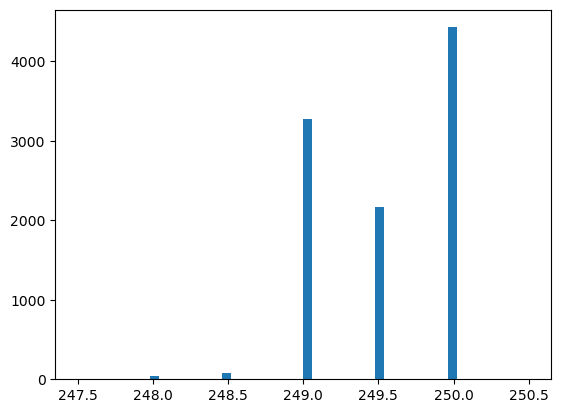

In [161]:
plt.hist((day_0_volcano_9500.mid_price.values - day_0_volcano_9750.mid_price.values), bins = 50)

In [162]:
np.corrcoef(day_0_volcano_9500.mid_price, day_0_volcano.mid_price)

array([[1.        , 0.99998326],
       [0.99998326, 1.        ]])

# Realised Volatility

In [163]:
log_returns = np.log(day_0_volcano.mid_price / day_0_volcano.mid_price.shift(1)).dropna()


In [164]:
window_size = 5

In [165]:
rolling_realised_vol = log_returns.rolling(window=window_size).apply(lambda x: np.sqrt(np.sum(x**2)))
annualised_vol = rolling_realised_vol * np.sqrt(252)


<Axes: >

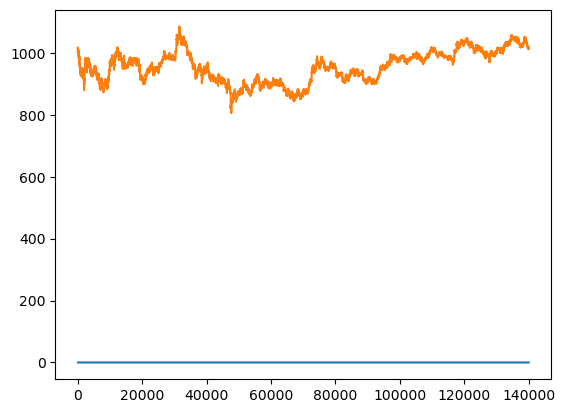

In [166]:
annualised_vol.plot()
day_0_volcano_9500.mid_price.plot()

In [263]:
day_0_volcano_10000 = market_data_round_3_all3days[market_data_round_3_all3days['product'] == 'VOLCANIC_ROCK_VOUCHER_10000']
market_data_round_3_all3days

In [296]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.optimize import brentq

import math

def norm_cdf(x):
    return 0.5 * (1 + math.erf(x / math.sqrt(2)))

def black_scholes_call_price(S, K, T, r, sigma):
    d1 = (math.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    return S * norm_cdf(d1) - K * math.exp(-r * T) * norm_cdf(d2)


def implied_volatility_call(S, K, T, r, market_price):
    try:
        implied_vol = brentq(
            lambda sigma: black_scholes_call_price(S, K, T, r, sigma) - market_price,
            0.01, 5  # Set lower bound to something reasonable like 0.1%
        )
        return implied_vol
    except ValueError:
        return np.nan


stock_prices = volcano_all_3.mid_price.values
option_prices = day_0_volcano_10000.mid_price.values

# Constant parameters
K = 10000
T_days = 8
r = 0

# Compute time to maturity for each day
T_series = ((T_days - day_0_volcano_10000.timestamp/1000000) / 365).values

# Calculate implied volatility time series
iv_series = []

for i in range(len(stock_prices)):
    S = stock_prices[i]
    C = option_prices[i]
    T = T_series[i]
    if T > 0:  # only compute for positive time to expiry
        iv = implied_volatility_call(S, K, T, r, C)
    else:
        iv = np.nan  # expired option
    if iv < 0.011:
        print(f"S: {S}, C: {C}, T: {T}")
    iv_series.append(iv * 100)



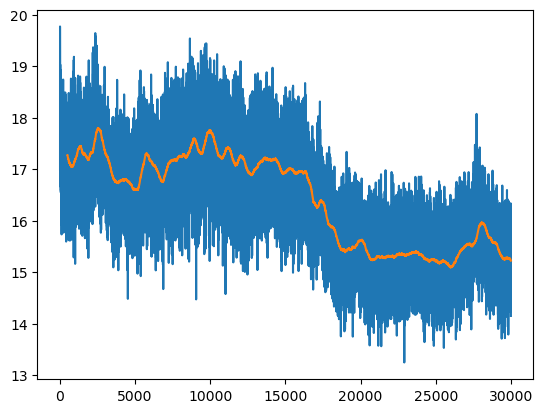

In [299]:
plt.plot(iv_series)
plt.plot(pd.Series(iv_series).rolling(500).mean())

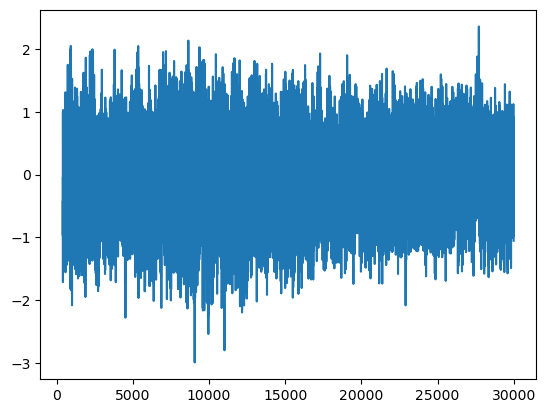

In [303]:
plt.plot(iv_series - pd.Series(iv_series).rolling(400).mean())


In [256]:
np.mean(iv_series)

14.277344138022649

In [209]:
import numpy as np

# Bisection method for implied volatility
def bisection_implied_vol(S, K, T, r, market_price, tol=1e-6, max_iter=100):
    # Initial bounds for volatility
    lower_bound = 1e-6
    upper_bound = 5.0
    
    for i in range(max_iter):
        # Midpoint for the current bounds
        sigma_mid = (lower_bound + upper_bound) / 2
        
        # Calculate the Black-Scholes price for this sigma
        option_price = black_scholes_call_price(S, K, T, r, sigma_mid)
        
        # If the price is close enough to the market price, return this sigma
        if abs(option_price - market_price) < tol:
            return sigma_mid
        
        # If the option price is higher than the market price, adjust the upper bound
        if option_price > market_price:
            upper_bound = sigma_mid
        else:
            # Otherwise, adjust the lower bound
            lower_bound = sigma_mid
    
    # Return the midpoint as the implied volatility
    return (lower_bound + upper_bound) / 2

# Example usage
S0 = stock_prices[0]  # Spot price
K = 10000   # Strike price
r = 0  # Risk-free rate
T = T_series[0]  # Time to maturity in years
market_price = option_prices[0]  # Market price of the option

implied_vol = bisection_implied_vol(S0, K, T, r, market_price)
print(f"Implied Volatility (Bisection Method): {implied_vol:.4f}")


Implied Volatility (Bisection Method): 0.1412


In [210]:
iv_series[0]

14.123914563085465

# Now with 10250 to check the vol

In [349]:
day_0_volcano_10250 = market_data_round_3_all3days[market_data_round_3_all3days['product'] == 'VOLCANIC_ROCK_VOUCHER_10250']
volcano_all_3 = market_data_round_3_all3days[market_data_round_3_all3days['product'] == 'VOLCANIC_ROCK']

In [350]:
day_0_volcano_10250

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
11,0,0,VOLCANIC_ROCK_VOUCHER_10250,273.0,19.0,NaN,NaN,NaN,NaN,274,19,NaN,NaN,NaN,NaN,273.5,0.0
19,0,100,VOLCANIC_ROCK_VOUCHER_10250,279.0,13.0,NaN,NaN,NaN,NaN,280,13,NaN,NaN,NaN,NaN,279.5,0.0
34,0,200,VOLCANIC_ROCK_VOUCHER_10250,282.0,15.0,NaN,NaN,NaN,NaN,283,15,NaN,NaN,NaN,NaN,282.5,0.0
47,0,300,VOLCANIC_ROCK_VOUCHER_10250,285.0,13.0,NaN,NaN,NaN,NaN,286,13,NaN,NaN,NaN,NaN,285.5,0.0
58,0,400,VOLCANIC_ROCK_VOUCHER_10250,279.0,15.0,NaN,NaN,NaN,NaN,280,15,NaN,NaN,NaN,NaN,279.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139939,2,2999500,VOLCANIC_ROCK_VOUCHER_10250,36.0,5.0,NaN,NaN,NaN,NaN,37,20,NaN,NaN,NaN,NaN,36.5,0.0
139947,2,2999600,VOLCANIC_ROCK_VOUCHER_10250,36.0,14.0,NaN,NaN,NaN,NaN,37,14,NaN,NaN,NaN,NaN,36.5,0.0
139959,2,2999700,VOLCANIC_ROCK_VOUCHER_10250,36.0,13.0,NaN,NaN,NaN,NaN,37,13,NaN,NaN,NaN,NaN,36.5,0.0
139977,2,2999800,VOLCANIC_ROCK_VOUCHER_10250,36.0,20.0,NaN,NaN,NaN,NaN,37,20,NaN,NaN,NaN,NaN,36.5,0.0


In [353]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.optimize import brentq

import math

def norm_cdf(x):
    return 0.5 * (1 + math.erf(x / math.sqrt(2)))

def black_scholes_call_price(S, K, T, r, sigma):
    d1 = (math.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    return S * norm_cdf(d1) - K * math.exp(-r * T) * norm_cdf(d2)


def implied_volatility_call(S, K, T, r, market_price):
    try:
        implied_vol = brentq(
            lambda sigma: black_scholes_call_price(S, K, T, r, sigma) - market_price,
            0.01, 5  # Set lower bound to something reasonable like 0.1%
        )
        return implied_vol
    except ValueError:
        return np.nan


stock_prices = volcano_all_3.mid_price.values
option_prices = day_0_volcano_10250.mid_price.values

# Constant parameters
K = 10250
T_days = 8
r = 0

# Compute time to maturity for each day
T_series = ((T_days - day_0_volcano_10250.timestamp/1000000) / 252).values

# Calculate implied volatility time series
iv_series = []

for i in range(len(stock_prices)):
    S = stock_prices[i]
    C = option_prices[i]
    T = T_series[i]
    if T > 0:  # only compute for positive time to expiry
        iv = implied_volatility_call(S, K, T, r, C)
    else:
        iv = np.nan  # expired option
    if iv < 0.011:
        print(f"S: {S}, C: {C}, T: {T}")
    iv_series.append(iv * 100)



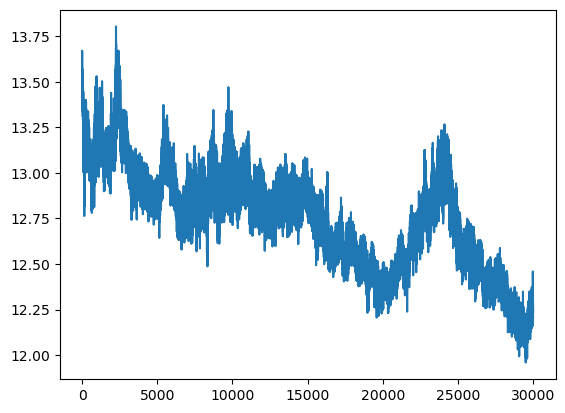

In [354]:
plt.plot(iv_series)

In [355]:
np.mean(iv_series[0:100000])

12.759334587420495

In [356]:
day_0_volcano_10250

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
11,0,0,VOLCANIC_ROCK_VOUCHER_10250,273.0,19.0,NaN,NaN,NaN,NaN,274,19,NaN,NaN,NaN,NaN,273.5,0.0
19,0,100,VOLCANIC_ROCK_VOUCHER_10250,279.0,13.0,NaN,NaN,NaN,NaN,280,13,NaN,NaN,NaN,NaN,279.5,0.0
34,0,200,VOLCANIC_ROCK_VOUCHER_10250,282.0,15.0,NaN,NaN,NaN,NaN,283,15,NaN,NaN,NaN,NaN,282.5,0.0
47,0,300,VOLCANIC_ROCK_VOUCHER_10250,285.0,13.0,NaN,NaN,NaN,NaN,286,13,NaN,NaN,NaN,NaN,285.5,0.0
58,0,400,VOLCANIC_ROCK_VOUCHER_10250,279.0,15.0,NaN,NaN,NaN,NaN,280,15,NaN,NaN,NaN,NaN,279.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139939,2,2999500,VOLCANIC_ROCK_VOUCHER_10250,36.0,5.0,NaN,NaN,NaN,NaN,37,20,NaN,NaN,NaN,NaN,36.5,0.0
139947,2,2999600,VOLCANIC_ROCK_VOUCHER_10250,36.0,14.0,NaN,NaN,NaN,NaN,37,14,NaN,NaN,NaN,NaN,36.5,0.0
139959,2,2999700,VOLCANIC_ROCK_VOUCHER_10250,36.0,13.0,NaN,NaN,NaN,NaN,37,13,NaN,NaN,NaN,NaN,36.5,0.0
139977,2,2999800,VOLCANIC_ROCK_VOUCHER_10250,36.0,20.0,NaN,NaN,NaN,NaN,37,20,NaN,NaN,NaN,NaN,36.5,0.0


# with 10500


In [357]:
day_all_volcano_10500 = market_data_round_3_all3days[market_data_round_3_all3days['product'] == 'VOLCANIC_ROCK_VOUCHER_10500']
volcano_all_3 = market_data_round_3_all3days[market_data_round_3_all3days['product'] == 'VOLCANIC_ROCK']

In [360]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.optimize import brentq

import math

def norm_cdf(x):
    return 0.5 * (1 + math.erf(x / math.sqrt(2)))

def black_scholes_call_price(S, K, T, r, sigma):
    d1 = (math.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    return S * norm_cdf(d1) - K * math.exp(-r * T) * norm_cdf(d2)


def implied_volatility_call(S, K, T, r, market_price):
    try:
        implied_vol = brentq(
            lambda sigma: black_scholes_call_price(S, K, T, r, sigma) - market_price,
            0.01, 5  # Set lower bound to something reasonable like 0.1%
        )
        return implied_vol
    except ValueError:
        return np.nan


stock_prices = volcano_all_3.mid_price.values
option_prices = day_all_volcano_10500.mid_price.values

# Constant parameters
K = 10500
T_days = 8
r = 0

# Compute time to maturity for each day
T_series = ((T_days - day_all_volcano_10500.timestamp/1000000) / 365).values

# Calculate implied volatility time series
iv_series = []

for i in range(len(stock_prices)):
    S = stock_prices[i]
    C = option_prices[i]
    T = T_series[i]
    if T > 0:  # only compute for positive time to expiry
        iv = implied_volatility_call(S, K, T, r, C)
    else:
        iv = np.nan  # expired option
    if iv < 0.011:
        print(f"S: {S}, C: {C}, T: {T}")
    iv_series.append(iv * 100)



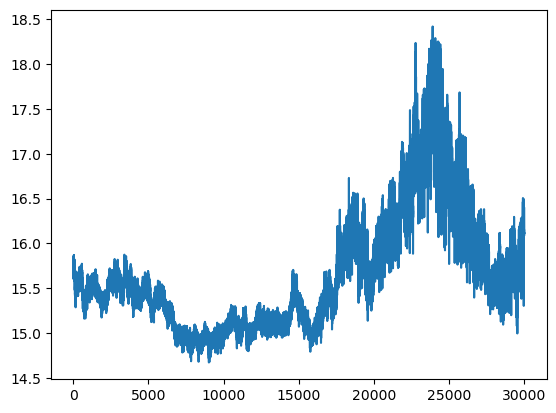

In [361]:
plt.plot(iv_series)

In [244]:
np.mean(iv_series[0:100000])

13.016332171031781

In [246]:
np.min(iv_series[0:100000])

12.191456518898335

# 9750

In [363]:
day_all_volcano_9750 = market_data_round_3_all3days[market_data_round_3_all3days['product'] == 'VOLCANIC_ROCK_VOUCHER_9750']
volcano_all_3 = market_data_round_3_all3days[market_data_round_3_all3days['product'] == 'VOLCANIC_ROCK']

In [364]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.optimize import brentq

import math

def norm_cdf(x):
    return 0.5 * (1 + math.erf(x / math.sqrt(2)))

def black_scholes_call_price(S, K, T, r, sigma):
    d1 = (math.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    return S * norm_cdf(d1) - K * math.exp(-r * T) * norm_cdf(d2)


def implied_volatility_call(S, K, T, r, market_price):
    try:
        implied_vol = brentq(
            lambda sigma: black_scholes_call_price(S, K, T, r, sigma) - market_price,
            0.01, 5  # Set lower bound to something reasonable like 0.1%
        )
        return implied_vol
    except ValueError:
        return np.nan


stock_prices = volcano_all_3.mid_price.values
option_prices = day_all_volcano_9750.mid_price.values

# Constant parameters
K = 9750
T_days = 8
r = 0

# Compute time to maturity for each day
T_series = ((T_days - day_all_volcano_9750.timestamp/1000000) / 365).values

# Calculate implied volatility time series
iv_series = []

for i in range(len(stock_prices)):
    S = stock_prices[i]
    C = option_prices[i]
    T = T_series[i]
    if T > 0:  # only compute for positive time to expiry
        iv = implied_volatility_call(S, K, T, r, C)
    else:
        iv = np.nan  # expired option
    if iv < 0.011:
        print(f"S: {S}, C: {C}, T: {T}")
    iv_series.append(iv * 100)



S: 10497.5, C: 747.5, T: 0.021915616438356166
S: 10470.0, C: 720.0, T: 0.021868767123287672
S: 10460.5, C: 710.5, T: 0.021866575342465753
S: 10463.5, C: 713.5, T: 0.021866301369863013
S: 10452.0, C: 702.0, T: 0.02186
S: 10480.5, C: 730.5, T: 0.021855342465753425
S: 10436.5, C: 686.5, T: 0.021826027397260275
S: 10434.0, C: 684.0, T: 0.021805753424657535
S: 10406.0, C: 656.0, T: 0.021785479452054793
S: 10408.0, C: 658.0, T: 0.021744109589041098
S: 10416.5, C: 666.5, T: 0.021731780821917807
S: 10462.5, C: 712.5, T: 0.02172328767123288
S: 10466.5, C: 716.5, T: 0.021712054794520548
S: 10484.5, C: 734.5, T: 0.021708219178082192
S: 10473.0, C: 723.0, T: 0.021705479452054796
S: 10472.5, C: 722.5, T: 0.021705205479452053
S: 10480.0, C: 730.0, T: 0.021703835616438356
S: 10487.5, C: 737.5, T: 0.021686849315068493
S: 10493.0, C: 743.0, T: 0.021685479452054793
S: 10511.5, C: 761.5, T: 0.02167945205479452
S: 10513.5, C: 763.5, T: 0.021676986301369862
S: 10483.5, C: 733.5, T: 0.02166904109589041
S: 1

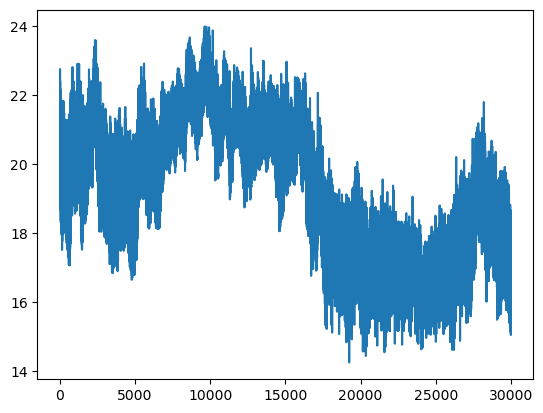

In [368]:
plt.plot(pd.Series(iv_series)[pd.Series(iv_series) > 1])

# Looking at delta of each option?

In [323]:
day_0_10500 = market_data_round_3_day_0[market_data_round_3_day_0['product'] == 'VOLCANIC_ROCK_VOUCHER_10500']
returns_0_10500 = day_0_10500.mid_price.pct_change()

day_0_102500 = market_data_round_3_day_0[market_data_round_3_day_0['product'] == 'VOLCANIC_ROCK_VOUCHER_10250']
returns_0_10250 = day_0_102500.mid_price.pct_change()

day_0_volcano = market_data_round_3_day_0[market_data_round_3_day_0['product'] == 'VOLCANIC_ROCK']

returns_0_volcano = day_0_volcano.mid_price.pct_change()

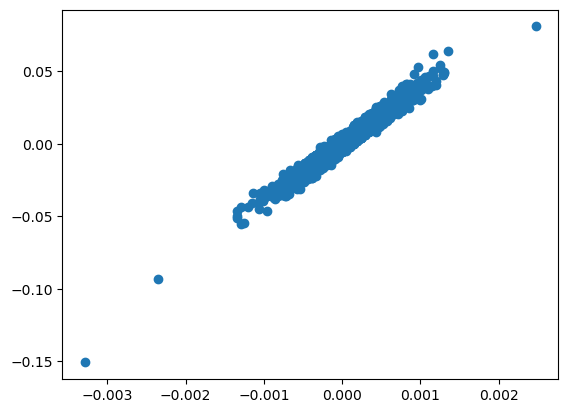

In [325]:
plt.scatter(returns_0_volcano, returns_0_10250)

array([       nan, 0.02193784, 0.01073345, ..., 0.00362976, 0.00361664,
       0.        ])

/var/folders/kh/zfkqn0cd0cq_vmxgs85vv4qc0000gn/T/ipykernel_24869/2626006257.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.plot(returns_0_10500.values/returns_0_volcano.values)
/var/folders/kh/zfkqn0cd0cq_vmxgs85vv4qc0000gn/T/ipykernel_24869/2626006257.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(returns_0_10500.values/returns_0_volcano.values)


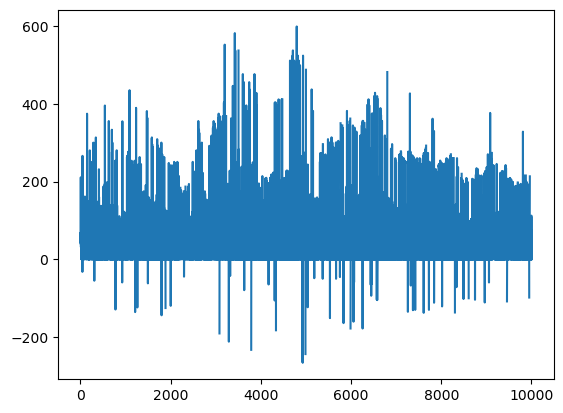

In [332]:
plt.plot(returns_0_10500.values/returns_0_volcano.values)

In [326]:
import statsmodels.api as sm

X = returns_0_volcano.dropna().values
y = returns_0_10250.dropna().values

# Add constant for intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# View the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                 2.001e+05
Date:                Tue, 15 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:15:19   Log-Likelihood:                 46574.
No. Observations:                9999   AIC:                        -9.314e+04
Df Residuals:                    9997   BIC:                        -9.313e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.149e-05    2.3e-05      2.243      0.0

In [320]:
import statsmodels.api as sm

X = returns_0_volcano.dropna().values
y = returns_0_10500.dropna().values

# Add constant for intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# View the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 5.930e+04
Date:                Tue, 15 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:14:03   Log-Likelihood:                 35817.
No. Observations:                9999   AIC:                        -7.163e+04
Df Residuals:                    9997   BIC:                        -7.162e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001   6.73e-05      2.128      0.0

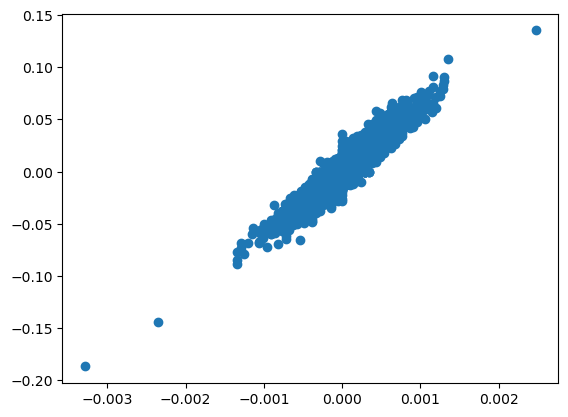

In [311]:
plt.scatter(returns_0_volcano, returns_0_10500)

In [337]:
import statsmodels.api as sm

X = day_0_volcano.mid_price.diff().dropna().values
y = day_0_102500.mid_price.diff().dropna().values

# Add constant for intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# View the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                 2.163e+05
Date:                Tue, 15 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:23:00   Log-Likelihood:                -6899.2
No. Observations:                9999   AIC:                         1.380e+04
Df Residuals:                    9997   BIC:                         1.382e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.005     -0.100      0.9

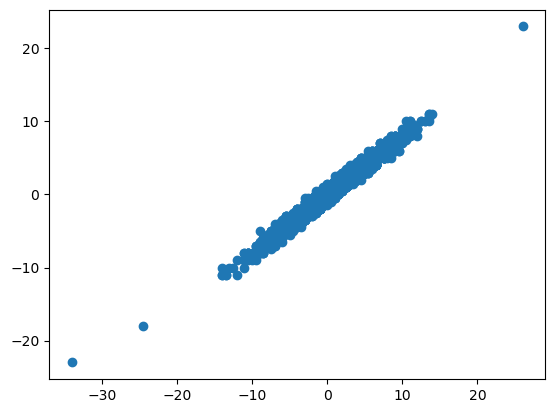

In [339]:
plt.scatter(day_0_volcano.mid_price.diff().values, day_0_102500.mid_price.diff().values)

<Axes: >

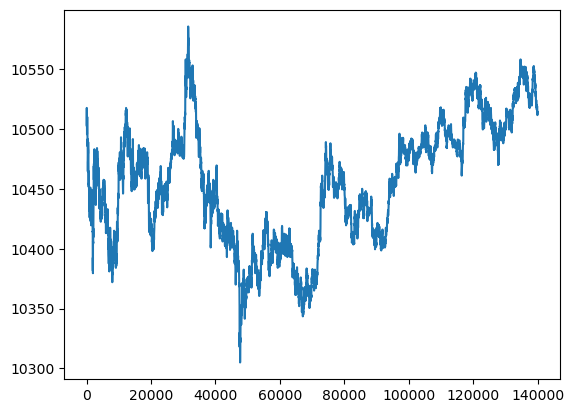

In [312]:
day_0_volcano.mid_price.plot()

# Delta all 3 days

In [345]:
market_data_round_3_all3days


,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,VOLCANIC_ROCK_VOUCHER_10500,99.0,19.0,NaN,NaN,NaN,NaN,100,19,NaN,NaN,NaN,NaN,99.5,0.0
1,0,0,DJEMBES,13493.0,72.0,NaN,NaN,NaN,NaN,13494,72,NaN,NaN,NaN,NaN,13493.5,0.0
2,0,0,CROISSANTS,4321.0,111.0,NaN,NaN,NaN,NaN,4322,111,NaN,NaN,NaN,NaN,4321.5,0.0
3,0,0,JAMS,6631.0,210.0,NaN,NaN,NaN,NaN,6633,210,NaN,NaN,NaN,NaN,6632.0,0.0
4,0,0,VOLCANIC_ROCK_VOUCHER_10000,505.0,19.0,NaN,NaN,NaN,NaN,506,19,NaN,NaN,NaN,NaN,505.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139995,2,2999900,PICNIC_BASKET2,30073.0,1.0,30072.0,39.0,NaN,NaN,30078,20,30079.0,20.0,NaN,NaN,30075.5,0.0
139996,2,2999900,VOLCANIC_ROCK_VOUCHER_9750,417.0,20.0,NaN,NaN,NaN,NaN,418,20,NaN,NaN,NaN,NaN,417.5,0.0
139997,2,2999900,PICNIC_BASKET1,58422.0,1.0,58421.0,39.0,NaN,NaN,58432,20,58433.0,20.0,NaN,NaN,58427.0,0.0
139998,2,2999900,CROISSANTS,4241.0,143.0,NaN,NaN,NaN,NaN,4242,143,NaN,NaN,NaN,NaN,4241.5,0.0


In [346]:
market_data_round_3_all3days

day_all_10250 = market_data_round_3_all3days[market_data_round_3_all3days['product'] == 'VOLCANIC_ROCK_VOUCHER_10250']
day_all_volcano  = market_data_round_3_all3days[market_data_round_3_all3days['product'] == 'VOLCANIC_ROCK']

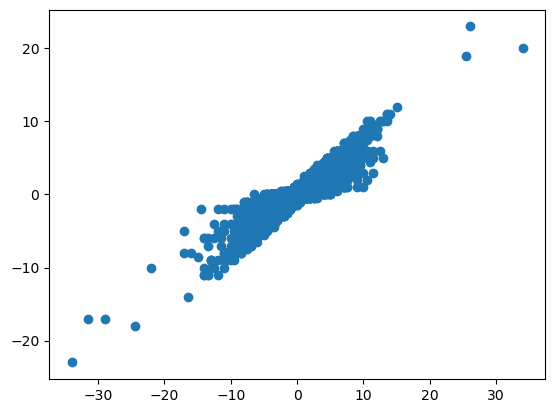

In [347]:
plt.scatter(day_all_volcano.mid_price.diff().values, day_all_10250.mid_price.diff().values)

In [343]:
day_all_volcano

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
13,0,0,VOLCANIC_ROCK,10502.0,205.0,NaN,NaN,NaN,NaN,10504,146,10505.0,59.0,NaN,NaN,10503.0,0.0
21,0,100,VOLCANIC_ROCK,10509.0,192.0,NaN,NaN,NaN,NaN,10511,122,10512.0,70.0,NaN,NaN,10510.0,0.0
31,0,200,VOLCANIC_ROCK,10512.0,167.0,NaN,NaN,NaN,NaN,10514,109,10515.0,58.0,NaN,NaN,10513.0,0.0
55,0,300,VOLCANIC_ROCK,10517.0,118.0,10516.0,68.0,NaN,NaN,10518,118,10519.0,68.0,NaN,NaN,10517.5,0.0
60,0,400,VOLCANIC_ROCK,10509.0,128.0,10508.0,73.0,NaN,NaN,10510,128,10511.0,73.0,NaN,NaN,10509.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139936,2,2999500,VOLCANIC_ROCK,10167.0,110.0,10166.0,51.0,NaN,NaN,10169,156,NaN,NaN,NaN,NaN,10168.0,0.0
139945,2,2999600,VOLCANIC_ROCK,10166.0,161.0,NaN,NaN,NaN,NaN,10168,101,10169.0,60.0,NaN,NaN,10167.0,0.0
139965,2,2999700,VOLCANIC_ROCK,10166.0,143.0,10165.0,51.0,NaN,NaN,10168,194,NaN,NaN,NaN,NaN,10167.0,0.0
139984,2,2999800,VOLCANIC_ROCK,10167.0,119.0,10166.0,57.0,NaN,NaN,10168,119,10169.0,57.0,NaN,NaN,10167.5,0.0


In [344]:
day_all_10250

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
